In [1]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import phate
import magic
import seaborn as sns
import graphtools
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from joblib import Parallel, delayed
from scipy import stats
import matplotlib

%matplotlib inline

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
week8_ln_dir = "week8_ln_cellranger"

In [12]:
week8_ln_ = scprep.io.load_10X(week8_ln_dir, gene_labels='both')

In [13]:
data = [week8_ln_]
lab = ["Week 8 LN"]

In [14]:
# library size filter
data_ = []
for batch in data:
    batch = scprep.filter.filter_library_size(batch, cutoff=1000)
    data_.append(batch)

# combine batches
data, sample_labels = scprep.utils.combine_batches(
    data_, lab
)

# clear memory
del(data_)

# store library size and put it into a metadata dataframe
libsize = scprep.measure.library_size(data)
metadata = pd.concat([sample_labels, libsize], axis=1)

In [15]:
# filter rare genes
data = scprep.filter.filter_rare_genes(data)

In [16]:
# normalize for library size
data, libsize_combined = scprep.normalize.library_size_normalize(data, return_library_size=True,rescale=1000)

In [17]:
data

,Mrpl15 (ENSMUSG00000033845),Lypla1 (ENSMUSG00000025903),Tcea1 (ENSMUSG00000033813),Atp6v1h (ENSMUSG00000033793),Rb1cc1 (ENSMUSG00000025907),4732440D04Rik (ENSMUSG00000090031),Pcmtd1 (ENSMUSG00000051285),Gm26901 (ENSMUSG00000097797),Rrs1 (ENSMUSG00000061024),Mybl1 (ENSMUSG00000025912),...,Tmlhe (ENSMUSG00000079834),AC133103.1 (ENSMUSG00000079190),Csprs (ENSMUSG00000062783),AC125149.3 (ENSMUSG00000079800),AC125149.2 (ENSMUSG00000079794),AC168977.2 (ENSMUSG00000094915),AC168977.1 (ENSMUSG00000079808),AC149090.1 (ENSMUSG00000095041),CAAA01118383.1 (ENSMUSG00000063897),CAAA01147332.1 (ENSMUSG00000095742)
AAACCTGCAAAGCAAT-1_Week 8 LN,0.000000,0.395257,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395257,0.000000,0.0
AAACCTGGTAACGTTC-1_Week 8 LN,0.351000,0.000000,0.351,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
AAACCTGGTTCACCTC-1_Week 8 LN,0.141084,0.423251,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141084,0.141084,0.0
AAACGGGAGAATGTGT-1_Week 8 LN,0.196040,0.000000,0.000,0.0,0.0,0.0,0.196040,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
AAACGGGAGCTATGCT-1_Week 8 LN,0.000000,0.000000,0.000,0.0,0.0,0.0,0.393856,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.393856,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACCAGTTA-1_Week 8 LN,0.219106,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
TTTGTCACACGGTTTA-1_Week 8 LN,0.112473,0.112473,0.000,0.0,0.0,0.0,0.112473,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112473,0.000000,0.0
TTTGTCACATGGTCAT-1_Week 8 LN,0.000000,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
TTTGTCACATGTAGTC-1_Week 8 LN,0.242014,0.000000,0.000,0.0,0.0,0.0,0.242014,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [18]:
# filter for mitochondrial expression
data, metadata = scprep.filter.filter_gene_set_expression(
    data, metadata, starts_with="mt-",
    percentile=90, keep_cells='below')

In [19]:
# square root transform (like log transform but stable at 0)
data = scprep.transform.sqrt(data)

In [20]:
# impute gene expression for dropped out genes
magic_op = magic.MAGIC(verbose=False)
data_magic = magic_op.fit(data).transform(genes='all_genes')

Running MAGIC with `solver='exact'` on 12116-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


In [21]:
# remove Cd8 negative cells
m = np.array(scprep.select.select_cols(data_magic, exact_word="Cd8a") > 0.5).flatten()
data_filt = data[m]
metadata_filt = metadata[m]
data_magic_filt = data_magic[m]

In [22]:
# reduce to first 100 principal components
pc_op = PCA(100)
data_pc = pc_op.fit_transform(data_filt)
data_pc = data_pc / np.std(data_pc[:,0])

phate_op = phate.PHATE(verbose=False)
data_phate_pc = phate_op.fit_transform(data_pc)

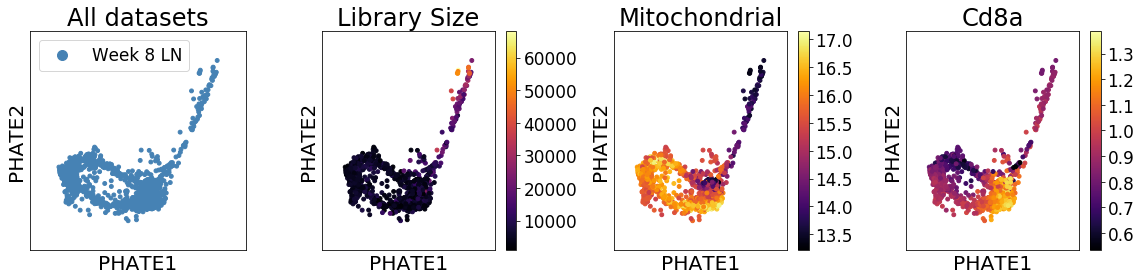

In [23]:
label = metadata_filt['sample_labels']
color = ['steelblue', 'midnightblue']

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
scprep.plot.scatter2d(data_phate_pc, ax=axes[0],fontsize=14, s=15, c=label, cmap=matplotlib.colors.ListedColormap(color),
                      ticks=False, label_prefix="PHATE", title="All datasets", legend=True)
scprep.plot.scatter2d(data_phate_pc, ax=axes[1],fontsize=14, s=15, c=metadata_filt['library_size'],
                      ticks=False, label_prefix="PHATE", title="Library Size")
scprep.plot.scatter2d(data_phate_pc, ax=axes[2],fontsize=14, s=15,
                      c=scprep.measure.gene_set_expression(data_magic_filt, starts_with="mt-"), title='Mitochondrial',
                      ticks=False, label_prefix='PHATE')
scprep.plot.scatter2d(data_phate_pc, ax=axes[3],fontsize=14, s=15, 
                      c=scprep.select.select_cols(data_magic_filt, exact_word="Cd8a"), title="Cd8a",
                     ticks=False, label_prefix="PHATE")

plt.tight_layout()

In [24]:
# data_pc is processed, post cd8 filtering, first 100 PCs
# data_phate_pc is data_pc transformed into visualizable dimensions with PHATE
# metadata_filt is processed, post cd8 filtering, containing sample_labels & library size
# data_magic_filt processed, post cd8 filtering, for marker gene coloring & analysis (imputed with MAGIC)

In [25]:
import dill
dill.dump_session("week8_ln_notebook_state.pkl")

In [29]:
# column names only Ensembl ID for matching with DB graph
data_magic_filt.columns = [x.split('(')[1][:-1] for x in data_magic_filt.columns]

In [32]:
data_magic_filt.to_csv("../datastore/week8_ln_magic_expr.csv")